### Данные были сгенерированы авторами статьи, Train без аномалий, в Test аномалии находятся с 999 значения по 1499. Можно использовать для classification_report

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

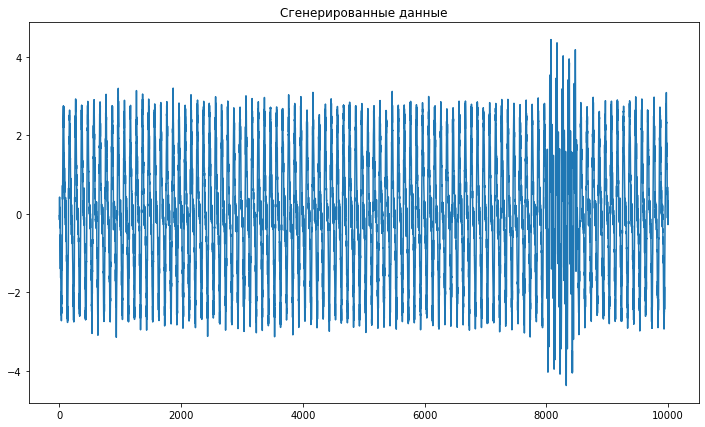

In [2]:
# from random import random
def gen_wave():
    t = np.arange(0.0, 100.0, 0.01)
    wave1 = np.sin(2 * 2 * np.pi * t)
    noise = np.random.normal(0, 0.2, len(t))
    wave1 = wave1 + noise
    wave2 = np.sin(2 * np.pi * t)
    t_rider = np.arange(0.0, 5.0, 0.01)
    wave3 = -2*np.sin(10 * np.pi * t_rider)
    insert = round(0.8 * len(t))
    wave1[insert:insert + 500] = wave1[insert:insert + 500] + wave3
    return wave1 - 2*wave2

wave = gen_wave()

plt.figure(figsize=(12,7))
plt.plot(wave)
plt.title('Сгенерированные данные')

def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean

def get_split_prep_data(train_start, train_end,
                          test_start, test_end, sequence_length):
    data = gen_wave()

    # train data

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)


    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]

    # test data

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    X_test = result[:, :-1]
    y_test = result[:, -1]

    X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

    return X_train, y_train, X_test, y_test

X_train,y_train, X_test, y_test = get_split_prep_data(0, 6999, 7000, 10000, 13)